<a href="https://colab.research.google.com/github/NurIzzati11/Data-Analytics-WIH2001-/blob/main/Body_Fat_Weight_Prediction(Regression_DA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as XGB
from math import sqrt
%matplotlib inline 

In [11]:
data=pd.read_csv('/content/bodyfat.csv')

In [12]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# **EDA (Exploratory Data Analysis)**

In [13]:
data.describe().loc[['min','max']]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
min,0.9950,0.0,22.0,118.50,29.50,31.1,79.3,69.4,85.0,47.2,33.0,19.1,24.8,21.0,15.8
max,1.1089,47.5,81.0,363.15,77.75,51.2,136.2,148.1,147.7,87.3,49.1,33.9,45.0,34.9,21.4


*   The minimal value of body fat is 0.0, which is definitely not possible and we would delete this record.

*   The minimal height is 29.5 inches, which is definitely not possible considering that the minimal age in the dataset is 22 years and we would delete this record as well.

* Dropping density column as Body fat has been calculated using a formulae involving Density

* Drop the outlier records from our dataset.

In [14]:
data= data.drop("Density", axis =1)
data = data.loc[data['BodyFat'] != 0.0]
data = data.loc[data['Height'] != 29.50]

print("Data Shape - ", data.shape)
data.head()


Data Shape -  (250, 14)


,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [15]:
print("Data New Min,Max")
data.describe().loc[['min','max']]

Data New Min,Max


,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
min,0.7,22.0,125.00,64.00,31.1,83.4,70.4,85.3,49.3,33.0,19.1,24.8,21.0,15.8
max,47.5,81.0,363.15,77.75,51.2,136.2,148.1,147.7,87.3,49.1,33.9,45.0,34.9,21.4


Change inch to cm, lbs to kilograms
* 1 inch = 2.54 cm
* 1 lbs = 0.45 kg





In [16]:
data['Weight'] = data['Weight'] * 0.45
data['Height'] = data['Height'] * 2.54

In [17]:
#usage in SPSS
data.to_csv('/content/bodyfat_new.csv', index=False)

In [18]:
data.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,69.4125,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,77.9625,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,69.3000,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,83.1375,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,82.9125,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [19]:
data.describe().loc[['min','max']]

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
min,0.7,22.0,56.2500,162.560,31.1,83.4,70.4,85.3,49.3,33.0,19.1,24.8,21.0,15.8
max,47.5,81.0,163.4175,197.485,51.2,136.2,148.1,147.7,87.3,49.1,33.9,45.0,34.9,21.4


# **Graphical Representation**

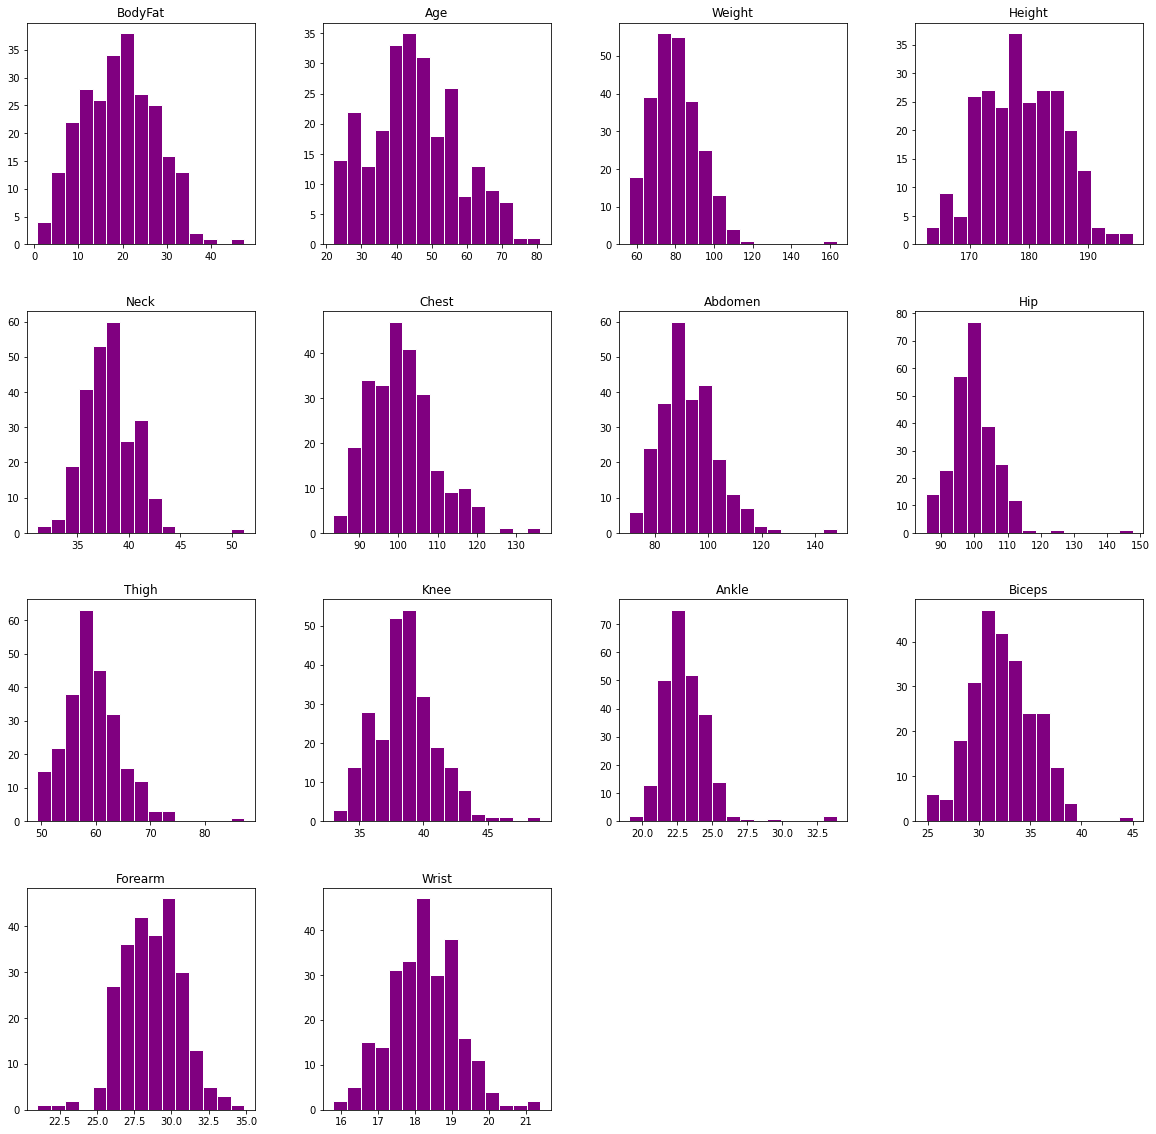

In [20]:
data.hist(figsize=(20,20),grid=False,color='purple',edgecolor = "white",bins=15);

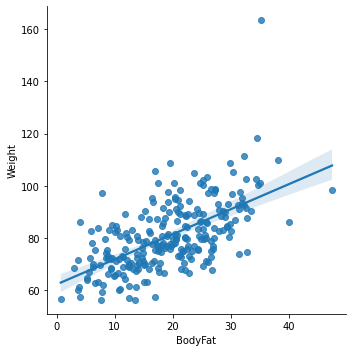

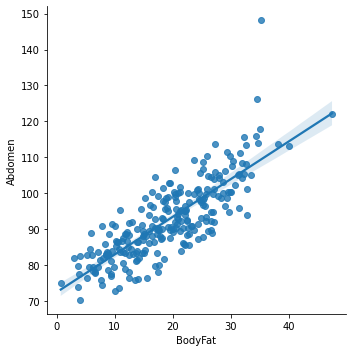

In [43]:
sns.lmplot(data=data, x='BodyFat',y='Weight')
sns.lmplot(data=data, x='BodyFat',y='Abdomen')

# **Correlation Table**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


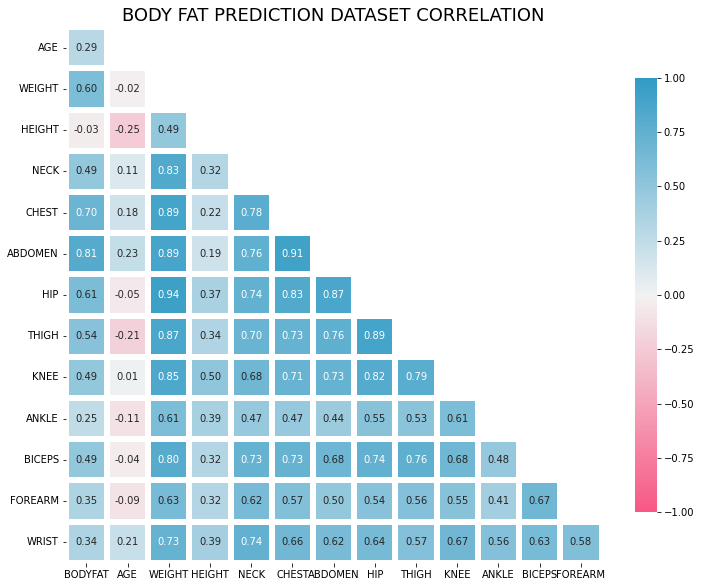

In [22]:

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = data.corr().iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'BODY FAT PREDICTION DATASET CORRELATION'
plt.title(title, loc='center', fontsize=18)
plt.show()

# **Splitting the model data into train and test data**

In [23]:
data_new= data.copy()

In [24]:
X = data_new.drop(['BodyFat'], axis = 1)
y = data_new['BodyFat']

# **Linear Regression**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('Score: {}'.format(reg.score(X_test, y_test)))
print('RMSE: {}'.format(sqrt(mean_squared_error(y_test, y_pred))))

Score: 0.559322215490553
RMSE: 4.916328187057484


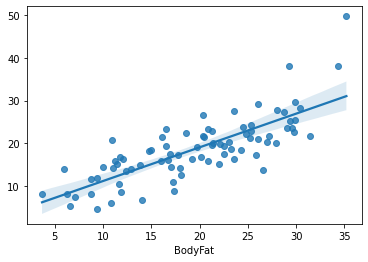

In [28]:
sns.regplot(x=y_test, y=y_pred)
#https://www.kaggle.com/code/dsanr1/body-fat-regression

Text(0, 0.5, 'Real BodyFat')

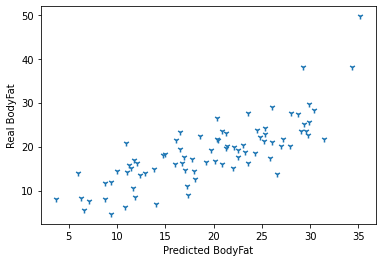

In [44]:
#https://www.kaggle.com/code/prajjwalpat/bodyfat-prediction-model-using-regression-in-py
plt.scatter(y_test,y_pred,marker="1")
plt.xlabel('Predicted BodyFat')
plt.ylabel('Real BodyFat')

# **K-Neareast Neighbors (KNN)**

In [30]:
ss= StandardScaler()
scaled_train= ss.fit_transform(X_train)
scaled_test = ss.fit_transform(X_test)
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(scaled_train,y_train)
print("Score:" , knn.score(scaled_test,y_test))


Score: 0.47286239047438383


In [31]:
pred= knn.predict(scaled_test)
mse = mean_squared_error(y_test,pred)
print(sqrt(mse))

5.377027888681873


In [36]:

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(scaled_train,y_train)  #fit the model
    pred=model.predict(scaled_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6.345978709634356
RMSE value for k=  2 is: 5.953421108200415
RMSE value for k=  3 is: 5.613000066421634
RMSE value for k=  4 is: 5.511010337475247
RMSE value for k=  5 is: 5.377027888681873
RMSE value for k=  6 is: 5.368999094035469
RMSE value for k=  7 is: 5.300351413302672
RMSE value for k=  8 is: 5.297410177942944
RMSE value for k=  9 is: 5.201829504592927
RMSE value for k=  10 is: 5.162839766817417
RMSE value for k=  11 is: 5.157084762734164
RMSE value for k=  12 is: 5.1701405279723875
RMSE value for k=  13 is: 5.153881496012611
RMSE value for k=  14 is: 5.2930134627722945
RMSE value for k=  15 is: 5.262562581706003
RMSE value for k=  16 is: 5.343557780309484
RMSE value for k=  17 is: 5.323681490127815
RMSE value for k=  18 is: 5.326347848865104
RMSE value for k=  19 is: 5.324192458133146
RMSE value for k=  20 is: 5.296241449743007


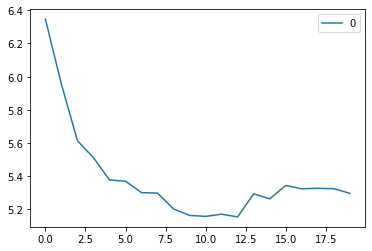

In [37]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# **Random Forests**

In [46]:
rf = RandomForestRegressor()
rf.fit(scaled_train, y_train)
print("Score:", rf.score(scaled_test,y_test))

Score: 0.5817057915983499


In [39]:
pred=rf.predict(scaled_test)
rmse = sqrt(mean_squared_error(y_test,pred))
print("RMSE:", rmse)

RMSE: 4.762981077748256


In [40]:
# Saving feature names for later use
feature_list = list(X_train.columns)

In [41]:
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
from sklearn.tree import export_graphviz
import pydot
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(scaled_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

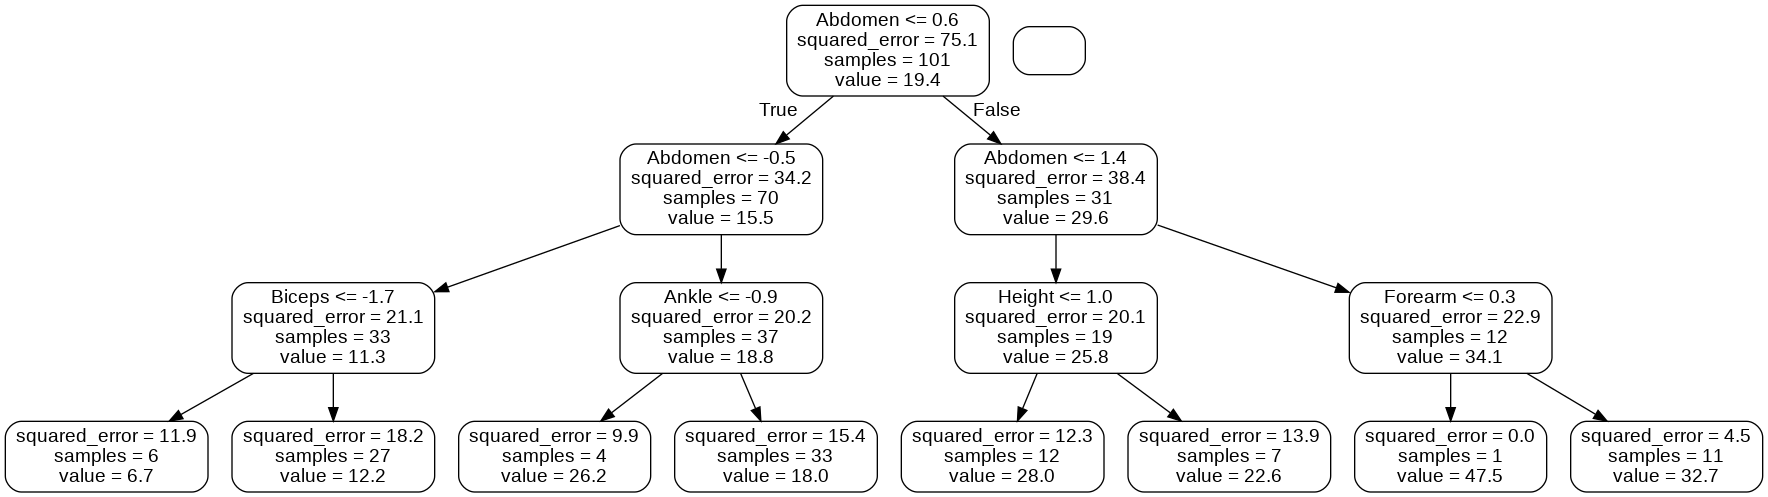

In [42]:
from IPython.display import Image
Image('/content/small_tree.png')